# Markov Decision Process

Assume that we have the following grid world:

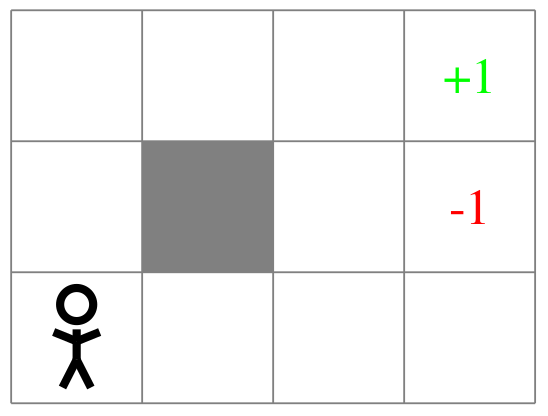

The goal of the agent whose position is at the bottom left corner is to maximize the expected future reward.
The top right (reward +1) and the middle right cell (reward -1) are terminal states.
There are four different actions the agent can choose, namely go up, down, left and right.
However, there is a chance that the agent will result in a wrong grid cell by accident.
If the action is going up, there is a chance of 0.8 that the agent moves up, a chance of 0.1 that he moves left and a chance of 0.1 that he moves right.
All other actions behave accordingly.
If the agent would bounce on a wall it stays at the current position.
Note that the agent cannot move through the grayed-out grid cell.
Assume a gamma value of $\gamma=0.9$.


### Environment Definition:

In the following, we define the described environment as an MDP.  The start (bottom left) is defined as index 0. The cell indices then increase from left to right and continue in the next row above. I.e. the cell above the start has index 4, the one with -1 reward has index 7, the cell with +1 index 11.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
class MDP:
    """  
    Rows in _transitions correspond to actions: 0: up, 1: right, 2: left, 3: down
    - First value in brackets is the index change in the environment grid -1:'left'| +1:'up'|-4:'down'|+4:'up', 
    - Second value is the probability of going into that direction when choosing an action
    """
    _transitions = np.array([    
        [[4, 0.8], [-1, 0.1], [1, 0.1]],  #Action 0 (up) -> with prob 0.8 go up, with 0.1 go left or right
        [[1, 0.8], [-4, 0.1], [4, 0.1]],  #with prob 0.8 go right
        [[-1, 0.8], [-4, 0.1], [4, 0.1]], #with prob 0.8 go left
        [[-4, 0.8], [-1, 0.1], [1, 0.1]]  #with prob 0.8 go down
        ])
    
    def __init__(self, gamma=0.9):
        self.reward = np.zeros(3*4)
        self.reward[-1] = +1  #index -1 = 11
        #self.reward[5] = -1
        self.reward[7] = -1
        self.gamma = gamma
        
    def rewards(self, state):
        """
        Returns the reward for the given state as scalar.
        """
        return self.reward[state]
    
    def _bounces(self, state, s):
        return np.sum(
            np.abs(np.array(np.where(np.arange(12).reshape((3,4)) == state)) 
                   - np.array(np.where(np.arange(12).reshape((3,4)) == s)))
        ) > 1
    
    def transition_probs(self, state, action):
        """
        For a given state action pair, returns a list of follow states including their probabilities.
        If a state has no follow states, we return [0, 0].
        Example:
        Suppose (s, a) =  (4, 'up'). We go up to 8 with probability 0.8, left or right with probability 0.1. 
        In the latter two cases, we bump into the wall and stay at 4 Thus the output is [[8, 0.8], [4, 0.1], [4, 0.1]]
        """
        if state == 7 or state == 11:
            return np.zeros((0, 2))
        trans = MDP._transitions[action].copy()
        trans = trans.T
        trans[0,:] += state 
        trans = trans.T     #follow states
        
        #if agent bounces into wall, stay at current state
        for i, (s_new, prob) in enumerate(trans):
            if s_new < 0 or s_new >= 3*4 or s_new == 5 or self._bounces(state, s_new):
                trans[i,0] = state
        return trans
    
mdp = MDP()
#mdp.transition_probs(4, 0)

Assume that the following utility values are given:

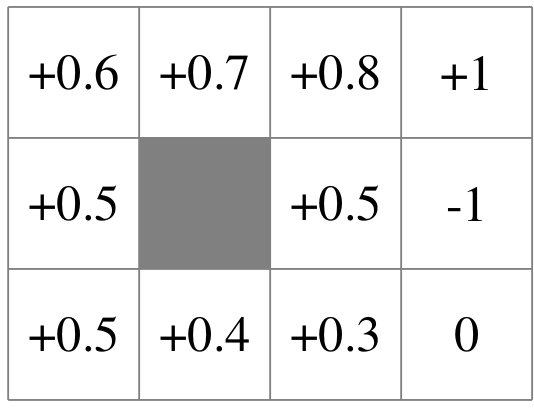

In [ ]:
def plot_environment(values):
    plt.figure()
    reshaped = values.reshape((3,4))
    ax = sns.heatmap(reshaped, annot=True)
    ax.invert_yaxis()
    ax.set_ylim(-0.1, 3.1)
    plt.show()

In [ ]:
utility_values = np.array([0.5,0.4,0.3,0.,0.5,-1.,0.5,-1.,0.6,0.7,0.8,1])
plot_environment(utility_values)

## Policy Improvement

Implement a policy improvement step in order to compute the policy that is defined by the given utility values.

In [ ]:
def policy_improvement(mdp_model, utilities):
    """
    Set policy to the action that maximizes the expected q-value
    """
    # TODO implement
    raise Exception("Not yet implemented!")

policy = policy_improvement(mdp, utility_values)

In [ ]:
# Prints the computed policy, remember: actions: 0: up, 1: right, 2: left, 3: down  (-1 = None)
policy = policy_improvement(mdp, utility_values).astype(int)
#plot_environment(policy)

## Policy Evaluation

Implement a policy evaluation step in order evaluate the utility values of the improved policy.

In [ ]:
def policy_evaluation(mdp_model, policy):
    """
    Get utility value u(s) for each state s by solving the equation
    U = R + gamma*P * U   <=> (I - gamma * P) *U  = R    where U is the utility vector for all states
    """
    # TODO implement
    raise Exception("Not yet implemented!")


In [ ]:
# Prints the starting utilities and the utilities of the improved policy
plot_environment(utility_values)
#plot_environment(policy_evaluation(mdp, policy))

## Policy Iteration

Implement the policy iteration algorithm by using the policy improvement and evaluation function defined above.

In [ ]:
def policy_iteration(mdp_model):
    """
    Repeatedly perform policy evaluation and improvement until policy doesn't change anymore
    """
    # TODO implement
    raise Exception("Not yet implemented!")

In [ ]:
# prints the optimal policy and the optimal utility values
optimal_policy = policy_iteration(mdp)
#plot_environment(optimal_policy)
#plot_environment(policy_evaluation(mdp, optimal_policy))

## Value Iteration

Implement the value iteration algorithm.

In [ ]:
def value_iteration(mdp_model, utilities):
    """
    At each step calculate new utilities as U(s') = R + gamma * max_a (Q(s', a))
    """
    # TODO implement
    raise Exception("Not yet implemented!")

In [ ]:
# prints utilities after Value Iteration
#optimal_values = value_iteration(mdp, utility_values)
#plot_environment(optimal_values)

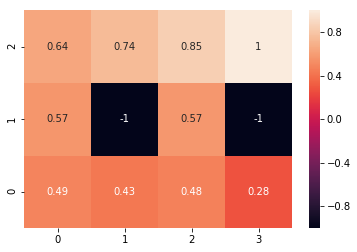